In [2]:
import os
import numpy as np
import nibabel as nib
from PIL import Image


In [3]:
def transform_array(arr):  
    # Get the shape of the input array  
    h, w = arr.shape  
      
    # Initialize the output array with zeros  
    output = np.zeros((h, w, 3), dtype=np.float32)  
      
    # Assign 1 to the corresponding class in the third dimension  
    output[:, :, 0] = (arr == 1).astype(np.float32)  # Class 1  
    output[:, :, 1] = (arr == 2).astype(np.float32)  # Class 2  
    output[:, :, 2] = (arr == 3).astype(np.float32)  # Class 3  
      
    return output 

def normalize_array(arr):  
    # Find the minimum and maximum values in the array  
    min_val = np.min(arr)  
    max_val = np.max(arr)  
      
    # Normalize the array to the range 0 to 1  
    normalized_arr = (arr - min_val) / (max_val - min_val)  
      
    # Scale the normalized array to the range 0 to 255  
    scaled_arr = normalized_arr * 255  
      
    # Convert the scaled array to integers  
    int_arr = scaled_arr.astype(np.uint8)  
      
    return int_arr 

In [6]:
case = "case_00034"
root_dir = f"kits23/dataset/{case}/"
imaging_filename = "imaging.nii.gz"
segmentation_filename = "segmentation.nii.gz"

img = nib.load(os.path.join(root_dir, imaging_filename))
seg = nib.load(os.path.join(root_dir, segmentation_filename))
pred = nib.load(f"/workspace/workspace-kits23/exp/kits23-train_val/segresnet2d_0/prediction_testing/dataset/{case}/imaging.nii.gz")

img_data = img.get_fdata()
seg_data = seg.get_fdata()
pred_data = pred.get_fdata()

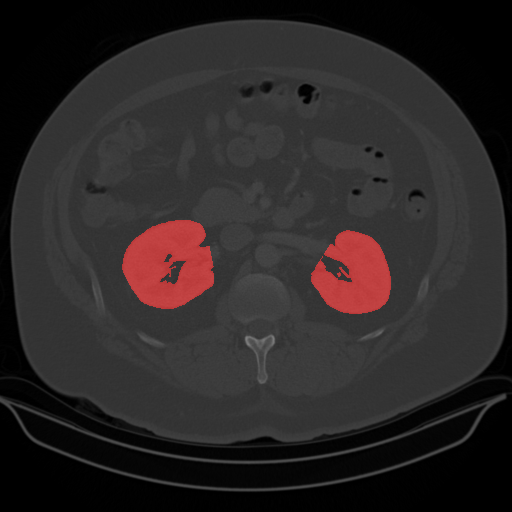

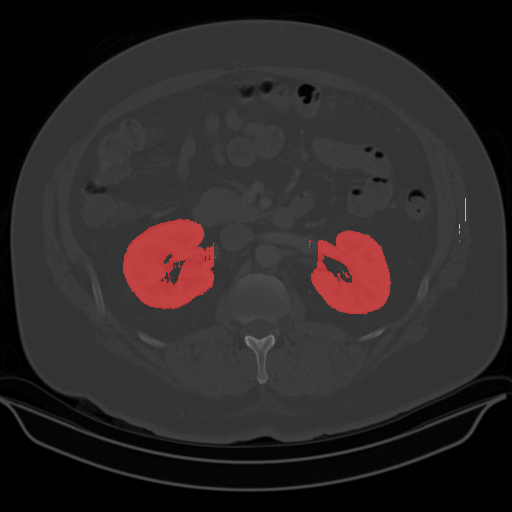

In [12]:
idx = 40

IMG = normalize_array(
    np.stack(
        [img_data[idx], img_data[idx], img_data[idx]], 
        axis=2
    )
)
SEG = transform_array(seg_data[idx])*255
PRED = pred_data[idx]*255

img_pil = Image.fromarray(IMG.astype('uint8'), 'RGB')
seg_pil = Image.fromarray(SEG.astype('uint8'), 'RGB')
pred_pil = Image.fromarray(PRED.astype('uint8'), 'RGB')

si_k = Image.blend(img_pil, seg_pil, 0.5)
si_k.show()

al_k = Image.blend(img_pil, pred_pil, 0.5)
al_k.show()